In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [34]:
#it is recommended to do train test split on data before performing any manipulations
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Age','EstimatedSalary']],df['Purchased'], test_size = 0.2, random_state = 42)


In [35]:
X_train.shape, y_train.shape

((324, 2), (324,))

In [36]:
#transformation - standardization rescaling  with mean 0 and sd = 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#now the function will learn both the mean and the sd of the training dataset
scaler.fit(X_train)
#we learn only from training set and transform both training and the test dataset

#transforming the datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
#showing the mean and scaler fit learned from train dataset

scaler.mean_

array([3.82314815e+01, 7.10246914e+04])

In [38]:
# X_train_scaled.describe()
#we get error because the object returned is not a dataframe but a numpy array

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [39]:
X_train_scaled.describe()

,Age,EstimatedSalary
count,3.240000e+02,3.240000e+02
mean,3.563679e-17,-2.741291e-18
std,1.001547e+00,1.001547e+00
min,-2.920784e+00,-1.793606e+00
25%,-6.575631e-01,-7.178220e-01
50%,-1.082375e-01,-6.324423e-04
75%,6.827914e-01,4.348041e-01
max,4.989504e+00,7.145649e+00


##effect of scaling


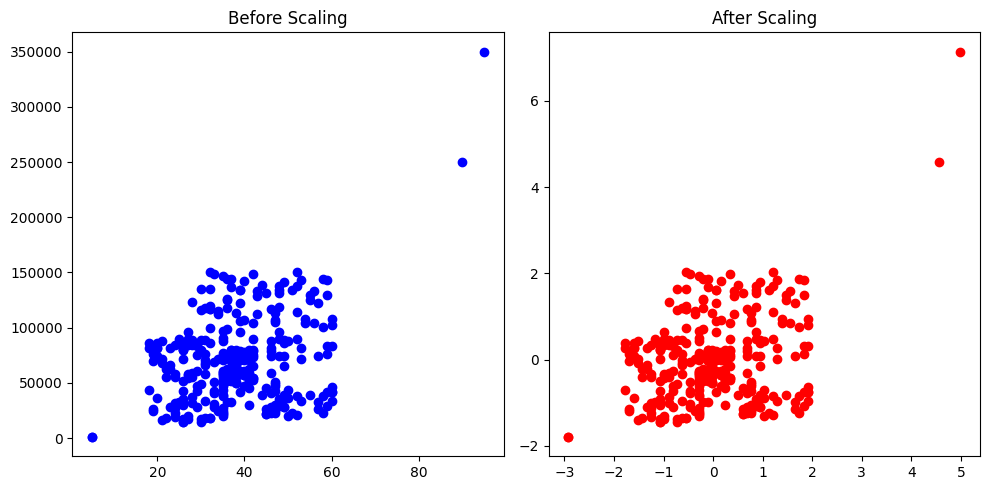

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

# Plotting the first scatter plot
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], color='blue')
ax1.set_title('Before Scaling')

# Plotting the second scatter plot
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: ylabel='Density'>

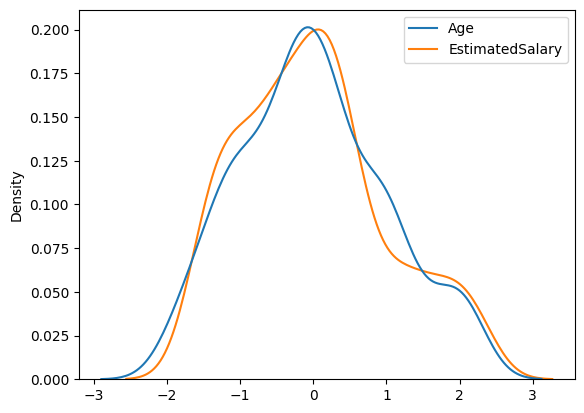

In [12]:
#plotting pdf to see scaling effect
#sns.kdeplot(data=X_train)
sns.kdeplot(data = X_train_scaled)

Why is scaling important?


In [13]:
from sklearn.linear_model import LogisticRegression


In [14]:
lr = LogisticRegression()
lr_s = LogisticRegression()
mod1 = lr.fit(X_train,y_train)
mod2 = lr_s.fit(X_train_scaled, y_train)

In [15]:
y_predict_mod1 = lr.predict(X_test)
y_predict_mod2 = lr_s.predict(X_test_scaled)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
print(accuracy_score(y_test,y_predict_mod1))
print(accuracy_score(y_test,y_predict_mod2)) #accuracy increases

0.8875
0.8625


#decision tree is not affected by scaling

In [18]:
from sklearn.tree import DecisionTreeClassifier


In [19]:
#training the model
dt = DecisionTreeClassifier()
dt_s = DecisionTreeClassifier()
mod_dt1 = dt.fit(X_train,y_train)
mod_dt2 = dt_s.fit(X_train_scaled, y_train)

In [20]:
#predicting on test set
y_pred_dt1 = dt.predict(X_test)
y_pred_dt2 = dt_s.predict(X_test_scaled)

In [21]:
print(accuracy_score(y_test,y_pred_dt1))
print(accuracy_score(y_test,y_pred_dt2)) #scaling no effect

0.8375
0.8375


effect of outliers

In [22]:
#standardization doesnt solve outlier issue

In [33]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})], ignore_index=True)


gradient descent, k means, knn, pca , neural nets- need standardisation
decision tree, random forest, gradient boost, xgboost - not needed to change standardisation

#Normalisation - it is the technique to remove the units and keep the magnitude only on a common scale - most problems are usually solved by scaling however minmax when you already know the numerical quantity is going to bounded between two set values, use robust scaling when too many outliers, use maxabscaling when sparse dataset with too many zeros

use everything as beginner

In [ ]:
#min max scaling -between 0 to 1
